In [1]:
# import sys
# !{sys.executable} -m pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt
import re
from matplotlib.ticker import MaxNLocator
import squarify
import textwrap3
from textwrap3 import wrap
import random2
from matplotlib_venn import venn2, venn3, venn3_circles
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pd.set_option('display.max_colwidth', 0)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

In [3]:
analysis = '/work/projects/ecosystem_biology/archaea/coevolution/analysis'
pics = '/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics'

In [4]:
functions_archaea = pd.read_csv(analysis+'/intermediate_results/archaea_kegg_unique_gut_functions_annotation.csv',
           sep='\t')

In [5]:
functions_bac = pd.read_csv(analysis+'/intermediate_results/bacteria_kegg_gut_functions_annotation.csv',
           sep='\t')

In [6]:
functions_archaea

protein  cluster      id  \
0     GUT_GENOME139173.fasta_357   135737   K12706   
1     GUT_GENOME105868.fasta_196   135737   K12706   
2     GUT_GENOME104819.fasta_673   135737   K12706   
3     GUT_GENOME048336.fasta_939   135737   K12706   
4     GUT_GENOME280278.fasta_484   135737   K12706   
...                          ...      ...      ...   
1342  GUT_GENOME140888.fasta_878   119654   K04402   
1343  GUT_GENOME158288.fasta_792   128310   K22340   
1344  GUT_GENOME029030.fasta_787   128310   K22340   
1345  GUT_GENOME247693.fasta_1138  14361    K10171   
1346  GUT_GENOME015317.fasta_1754  14361    K10171   

                                             description  count_x  count_y  
0     novobiocin biosynthesis protein NovC                21       16       
1     novobiocin biosynthesis protein NovC                21       16       
2     novobiocin biosynthesis protein NovC                21       16       
3     novobiocin biosynthesis protein NovC                21       16       
4     novobiocin biosynthesis protein NovC                21       16       
...                                    ...                ..       ..       
1342  growth arrest and DNA-damage-inducible protein      2        2        
1343  formate dehydrogenase (NAD+, ferredoxin) subunit C  2        2        
1344  formate dehydrogenase (NAD+, ferredoxin) subunit C  2        2        
1345  toll-like receptor 10                               2        2        
1346  toll-like receptor 10                               2        2        

[1347 rows x 6 columns]

In [7]:
functions_bac

protein    cluster      id  \
0         3300029099_20_451        b_6914379  K03210   
1         3300029099_20_451        b_6914379  K03210   
2         3300029381_21_762        b_6914379  K03210   
3         3300029381_21_762        b_6914379  K03210   
4         3300029793_21_645        b_6914379  K03210   
...                     ...              ...     ...   
74450172  3300029606_6_196         b_7460573  K20534   
74450173  GUT_GENOME143134_1_2943  b_7460573  K20534   
74450174  GUT_GENOME141055_147_8   b_7460573  K20534   
74450175  GUT_GENOME098776_110_7   b_7460573  K20534   
74450176  GUT_GENOME231240_7_4     b_7460573  K20534   

                                          description  
0         preprotein translocase subunit YajC          
1         preprotein translocase subunit YajC          
2         preprotein translocase subunit YajC          
3         preprotein translocase subunit YajC          
4         preprotein translocase subunit YajC          
...                                       ...          
74450172  polyisoprenyl-phosphate glycosyltransferase  
74450173  polyisoprenyl-phosphate glycosyltransferase  
74450174  polyisoprenyl-phosphate glycosyltransferase  
74450175  polyisoprenyl-phosphate glycosyltransferase  
74450176  polyisoprenyl-phosphate glycosyltransferase  

[74450177 rows x 4 columns]

In [ ]:
# ### Loop the data lines
# with open("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_ec.tsv", 'r') as temp_f:
#     # get No of columns in each line
#     col_count = [ len(l.split("\t")) for l in temp_f.readlines() ]

# ### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
# column_names = [i for i in range(0, max(col_count))]

# ### Read csv
# df = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_ec.tsv", delimiter="\t", names=column_names)
# df.dropna(axis=1, how='all', inplace=True)
# df.columns=['protein', 'id', 'description']
# ec = df



# ### Loop the data lines
# with open("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_pfam.tsv", 'r') as temp_f:
#     # get No of columns in each line
#     col_count = [ len(l.split("\t")) for l in temp_f.readlines() ]

# ### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
# column_names = [i for i in range(0, max(col_count))]

# ### Read csv
# df = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_pfam.tsv", delimiter="\t", names=column_names)
# df.dropna(axis=1, how='all', inplace=True)
# df.columns=['protein', 'id', 'description']
# pfam = df

In [6]:
ec = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_ec.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
eggnog = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_eggnog.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
pfam = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_pfam.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
kegg = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_kegg.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])

In [8]:
functions_archaea.cluster.nunique()

175

In [9]:
functions_bac.cluster.nunique()

1537608

In [8]:
functions_archaea.id.nunique()

101

In [11]:
functions_bac.id.nunique()

17215

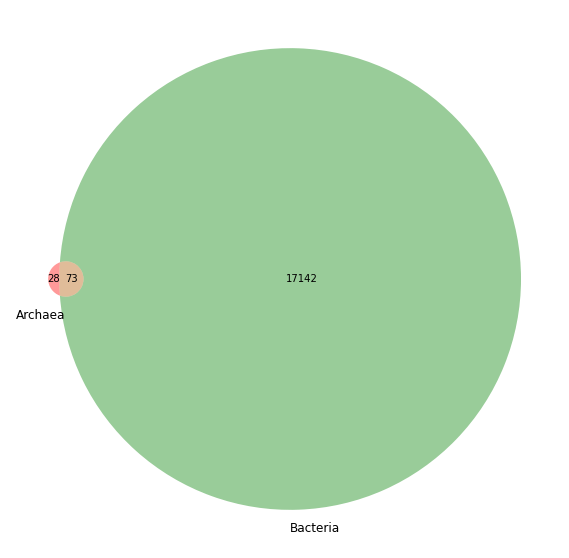

In [27]:
plt.figure(figsize=(10,10))
arch = set(functions_archaea.id.unique())
bac = set(functions_bac.id.unique())

venn2([arch, bac], ('Archaea', 'Bacteria'))
plt.show()

In [15]:
# common_functions = pd.DataFrame(list(arch & bac), columns=['id'])\
# .merge(functions_archaea, on='id')
# common_functions # annotated as archaea

common_functions = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/common_functions.csv',
                              header=None, 
                                names = ['id', 'protein', 'cluster', 'description','count_x', 'count_y'])

common_functions

id                      protein  cluster  \
0     K14171  GUT_GENOME132203.fasta_1015  108584    
1     K14171  GUT_GENOME140888.fasta_1306  108584    
2     K15044  GUT_GENOME048380.fasta_988   38898     
3     K15044  GUT_GENOME048397.fasta_692   38898     
4     K16158  GUT_GENOME068622.fasta_447   55510     
...      ...                         ...     ...     
1142  K22340  GUT_GENOME029030.fasta_787   128310    
1143  K06293  GUT_GENOME087444.fasta_530   71544     
1144  K06293  GUT_GENOME091533.fasta_908   71544     
1145  K22541  GUT_GENOME237437.fasta_1133  190166    
1146  K22541  GUT_GENOME236870.fasta_1268  190166    

                                             description  count_x  count_y  
0     alkyl hydroperoxide reductase 1                     2        2        
1     alkyl hydroperoxide reductase 1                     2        2        
2     Arf-GAP domain and FG repeats-containing protein 1  2        2        
3     Arf-GAP domain and FG repeats-containing protein 1  2        2        
4     methane monooxygenase component A beta chain        7        7        
...                                            ...       ..       ..        
1142  formate dehydrogenase (NAD+, ferredoxin) subunit C  2        2        
1143  spore germination protein BC                        2        2        
1144  spore germination protein BC                        2        2        
1145  3-hydroxyacyl-thioester dehydratase, fungi type     2        2        
1146  3-hydroxyacyl-thioester dehydratase, fungi type     2        2        

[1147 rows x 6 columns]

In [20]:
common_functions[['id', 'cluster']].drop_duplicates()

id  cluster
0     K14171  108584 
2     K15044  38898  
4     K16158  55510  
11    K20262  211970 
13    K10984  104986 
...      ...     ... 
1131  K19082  60600  
1139  K19082  36675  
1141  K22340  128310 
1143  K06293  71544  
1145  K22541  190166 

[131 rows x 2 columns]

In [19]:
tmp = pd.DataFrame(list(arch & bac), columns=['id'])\
.merge(functions_archaea, on='id')\
.groupby(['id','description'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'count'})

tmp[['count', 'id', 'description']].sort_values('count', ascending=False)\
# .head(10)\
# .to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/tmp_common_functions.csv',
#                 sep=',', index=False, header=None)

count      id  \
39  399    K14495   
27  158    K11234   
24  94     K10436   
31  54     K12706   
1   52     K00214   
..  ..        ...   
22  2      K10171   
38  2      K14171   
37  2      K13869   
23  2      K10203   
0   2      K00105   

                                                           description  
39  F-box protein GID2                                                  
27  mating pheromone alpha-factor                                       
24  microtubule-associated protein, RP/EB family                        
31  novobiocin biosynthesis protein NovC                                
1   biliverdin reductase                                                
..                   ...                                                
22  toll-like receptor 10                                               
38  alkyl hydroperoxide reductase 1                                     
37  solute carrier family 7 (L-type amino acid transporter), member 11  
23  elongation of very long chain fatty acids protein 6                 
0   alpha-glycerophosphate oxidase                                      

[73 rows x 3 columns]

In [ ]:
# tmp = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/tmp_common_functions.csv',
#                 sep=',', header=None, names = ['count', 'id'])

In [ ]:
# tmp = tmp[['count', 'id']].sort_values('count', ascending=False)

# text = " ".join(cat.split()[0] for cat in tmp.id)

# stopwords = set(["id", "count", "columns"])

# wordcloud = WordCloud(
#     width=1500,
#     height=1000,
#     stopwords=stopwords, 
#     collocations = False, 
#     background_color = 'white', colormap='tab20' )\
# .generate(text)

# plt.figure(figsize=(15, 10))
# plt.imshow(wordcloud, interpolation='gaussian')
# plt.axis("off")

# # plt.savefig('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics/wordcloud_bac_arch_ids.png', format='png', dpi=80)

# plt.show()



In [9]:
kegg_nog = common_functions[['protein', 'cluster', 'id', 'description']]\
.merge(eggnog, on='protein')\
.rename(columns={'id_x':'id_kegg',
                'description_x':'description_kegg',
                'id_y':'id_nog',
                'description_y':'description_nog'})
kegg_nog.head()

protein  cluster id_kegg  \
0  GUT_GENOME132203.fasta_1015  108584   K14171   
1  GUT_GENOME140888.fasta_1306  108584   K14171   
2  GUT_GENOME232921.fasta_508   211970   K20262   
3  GUT_GENOME232921.fasta_508   211970   K20262   
4  GUT_GENOME014311.fasta_355   211970   K20262   

                         description_kegg      id_nog  \
0  alkyl hydroperoxide reductase 1         arCOG01513   
1  alkyl hydroperoxide reductase 1         arCOG01513   
2  dihydrophenazinedicarboxylate synthase  23PA0        
3  dihydrophenazinedicarboxylate synthase  23PJX        
4  dihydrophenazinedicarboxylate synthase  23PA0        

                               description_nog  
0  Hydantoinase/oxoprolinase N-terminal region  
1  Hydantoinase/oxoprolinase N-terminal region  
2  Pyridoxamine 5'-phosphate oxidase            
3  4Fe-4S binding domain                        
4  Pyridoxamine 5'-phosphate oxidase

In [111]:
tmp = tmp.sort_values('count', ascending=False)
tmp.head(10)

count      id
0  433    K14495
1  158    K11234
2  96     K10436
3  90     K23498
4  65     K12706
5  42     K02369
6  37     K21577
7  29     K19543
8  27     K05439
9  24     K16195

In [ ]:
kegg_nog[kegg_nog.id_kegg=='K00214']\
.groupby(['description_kegg', 'id_nog', 'description_nog'], as_index=False)\
.agg({'protein':'count'})

In [ ]:
common_functions[common_functions.id=='K12706'].merge(pfam, on='protein')

In [24]:
tmp.sort_values('count', ascending=False)\
.merge(kegg_nog, left_on='id', right_on='id_kegg')\
.groupby(['cluster','id_kegg', 'description_kegg', 'id_nog', 'description_nog'], as_index=False)\
.agg({'protein':'count'})\
.sort_values('protein', ascending=False)

cluster id_kegg  \
31  95863    K14495   
11  37787    K10436   
49  159495   K02369   
22  51418    K14495   
4   18692    K09469   
..    ...       ...   
63  237250   K14495   
21  50205    K21577   
55  208725   K21577   
25  64521    K09974   
42  146346   K11234   

                                                        description_kegg  \
31  F-box protein GID2                                                     
11  microtubule-associated protein, RP/EB family                           
49  alpha-1,4-N-acetylglucosaminyltransferase EXTL2                        
22  F-box protein GID2                                                     
4   2-aminoethylphosphonate-pyruvate transaminase                          
..                                            ...                          
63  F-box protein GID2                                                     
21  glycine/sarcosine/betaine reductase complex component C subunit beta   
55  glycine/sarcosine/betaine reductase complex component C subunit beta   
25  uncharacterized protein                                                
42  mating pheromone alpha-factor                                          

        id_nog  \
31  23PN9        
11  2Y7WF        
49  23PNX        
22  23PN9        
4   23NPQ        
..    ...        
63  23PN9        
21  23PGK        
55  23PGK        
25  arCOG03704   
42  arCOG02284   

                                                                                    description_nog  \
31  Predicted membrane protein (DUF2142)                                                              
11  Required for chromosome condensation and partitioning                                             
49  Phage integrase family                                                                            
22  Predicted membrane protein (DUF2142)                                                              
4   Aminotransferase                                                                                  
..               ...                                                                                  
63  Predicted membrane protein (DUF2142)                                                              
21  Papain family cysteine protease                                                                   
55  Papain family cysteine protease                                                                   
25  cell redox homeostasis                                                                            
42  Secreted protein containing C-terminal beta-propeller domain distantly related to WD-40 repeats   

    protein  
31  343      
11  87       
49  38       
22  15       
4   12       
..  ..       
63  2        
21  1        
55  1        
25  1        
42  1        

[64 rows x 6 columns]

In [21]:
kegg_nog.cluster.nunique() # only 67 clusters are annotated with eggnog

67

In [106]:
# most abundant groups of proteins annotated with eggnog

df = common_functions[['cluster', 'protein']]\
.groupby('cluster', as_index=False)\
.count().sort_values('protein', ascending=False)[['cluster']]\
.merge(common_functions[['cluster', 'protein']], on='cluster')\
.merge(eggnog, on='protein')

dg = df.groupby(['cluster','id', 'description'], as_index=False).agg({'protein':'count'})


abundant_eggnog = df[['cluster']]\
.merge(dg[['cluster','id','description', 'protein']])\
.drop_duplicates(['cluster','description', 'protein'])\
.head(10)

abundant_eggnog.rename(columns={'id':'id_nog',
                             'description':'description_nog',
                             'protein':'protein_nog'},
                    inplace=True)

In [112]:
# most abundant groups of proteins annotated with ec

df = common_functions[['cluster', 'protein']]\
.groupby('cluster', as_index=False)\
.count().sort_values('protein', ascending=False)[['cluster']]\
.merge(common_functions[['cluster', 'protein']], on='cluster')\
.merge(ec, on='protein')

dg = df.groupby(['cluster','id', 'description'], as_index=False).agg({'protein':'count'})


abundant_ec = df[['cluster']]\
.merge(dg[['cluster','id','description', 'protein']])\
.drop_duplicates(['cluster','description', 'protein'])\
.head(10)

abundant_ec.rename(columns={'id':'id_ec',
                             'description':'description_ec',
                             'protein':'protein_ec'},
                    inplace=True)

In [100]:
# most abundant groups of proteins annotated with ec

df = common_functions[['cluster', 'protein']]\
.groupby('cluster', as_index=False)\
.count().sort_values('protein', ascending=False)[['cluster']]\
.merge(common_functions[['cluster', 'protein']], on='cluster')\
.merge(kegg, on='protein')

dg = df.groupby(['cluster','id', 'description'], as_index=False).agg({'protein':'count'})


abundant_kegg = df[['cluster']]\
.merge(dg[['cluster','id','description', 'protein']])\
.drop_duplicates(['cluster','description', 'protein'])\
.head(10)

abundant_kegg.rename(columns={'id':'id_kegg',
                             'description':'description_kegg',
                             'protein':'protein_kegg'},
                    inplace=True)

In [103]:
# most abundant groups of proteins annotated with ec

df = common_functions[['cluster', 'protein']]\
.groupby('cluster', as_index=False)\
.count().sort_values('protein', ascending=False)[['cluster']]\
.merge(common_functions[['cluster', 'protein']], on='cluster')\
.merge(pfam, on='protein')

dg = df.groupby(['cluster','id', 'description'], as_index=False).agg({'protein':'count'})


abundant_pfam = df[['cluster']]\
.merge(dg[['cluster','id','description', 'protein']])\
.drop_duplicates(['cluster','description', 'protein'])\
.head(10)

abundant_pfam.rename(columns={'id':'id_pfam',
                             'description':'description_pfam',
                             'protein':'protein_pfam'},
                    inplace=True)

In [113]:
dfs = [abundant_eggnog, abundant_kegg, abundant_ec, abundant_pfam]
# nan_value = 0

# # solution 1 (fast)
# pd.concat(dfs, join='outer', axis=1).fillna(nan_value)

from functools import reduce
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    reduce(lambda x,y: pd.merge(x,y, on='cluster', how='outer'), dfs)

cluster id_nog  \
0   95863    23PN9   
1   95863    23PN9   
2   37787    2Y7WF   
3   129373   23NSJ   
4   129373   23NSJ   
5   129373   23NSJ   
6   129373   23NSJ   
7   129373   23NSJ   
8   129373   23NSJ   
9   129373   23NSJ   
10  129373   23NSJ   
11  129373   23NSJ   
12  129373   23NSJ   
13  129373   23NSJ   
14  129373   23NSJ   
15  129373   23NSJ   
16  129373   23NSJ   
17  129373   23NSJ   
18  129373   23NSJ   
19  129373   23NSJ   
20  129373   23NSJ   
21  129373   23NSJ   
22  129373   23NSJ   
23  129373   23NSJ   
24  129373   23NSJ   
25  129373   23NSJ   
26  129373   23NSJ   
27  129373   23P4J   
28  129373   23P4J   
29  129373   23P4J   
30  129373   23P4J   
31  129373   23P4J   
32  129373   23P4J   
33  129373   23P4J   
34  129373   23P4J   
35  129373   23P4J   
36  129373   23P4J   
37  129373   23P4J   
38  129373   23P4J   
39  129373   23P4J   
40  129373   23P4J   
41  129373   23P4J   
42  129373   23P4J   
43  129373   23P4J   
44  129373   23P4J   
45  129373   23P4J   
46  129373   23P4J   
47  129373   23P4J   
48  129373   23P4J   
49  129373   23P4J   
50  129373   23P4J   
51  159495   23PNX   
52  51418    23PN9   
53  18692    23NPQ   
54  45460    23PN9   
55  45460    23PN9   
56  135089   23PJW   
57  60600    23PS0   
58  3530     NaN     
59  80404    NaN     
60  135737   NaN     
61  74163    NaN     
62  74163    NaN     
63  74163    NaN     
64  74163    NaN     
65  74163    NaN     
66  74163    NaN     

                                                                                                                description_nog  \
0   Predicted membrane protein (DUF2142)                                                                                          
1   Predicted membrane protein (DUF2142)                                                                                          
2   Required for chromosome condensation and partitioning                                                                         
3   PFAM Oxidoreductase                                                                                                           
4   PFAM Oxidoreductase                                                                                                           
5   PFAM Oxidoreductase                                                                                                           
6   PFAM Oxidoreductase                                                                                                           
7   PFAM Oxidoreductase                                                                                                           
8   PFAM Oxidoreductase                                                                                                           
9   PFAM Oxidoreductase                                                                                                           
10  PFAM Oxidoreductase                                                                                                           
11  PFAM Oxidoreductase                                                                                                           
12  PFAM Oxidoreductase                                                                                                           
13  PFAM Oxidoreductase                                                                                                           
14  PFAM Oxidoreductase                                                                                                           
15  PFAM Oxidoreductase                                                                                                           
16  PFAM Oxidoreductase                                                                                                           
17  PFAM Oxidoreductase                                                                                                           
18  PFAM Oxidoredu